In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
label_dict = {}
for i in range(len(df["label"].unique())):
    label_dict[df["label"].unique()[i]] = i
label_dict

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [5]:
df["label"] = df["label"].map(label_dict)

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall,label
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


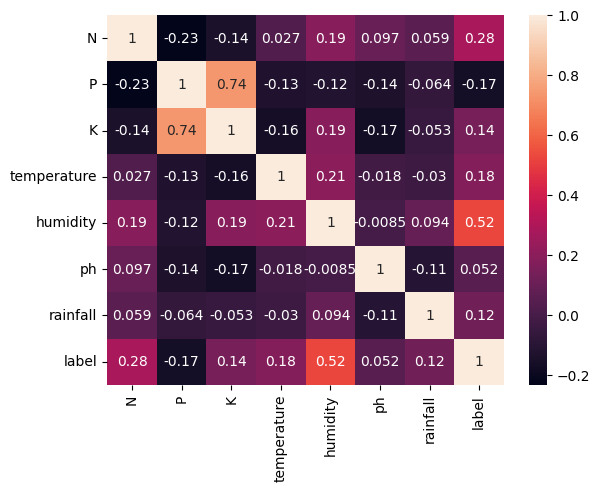

In [7]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [8]:
x = df.drop("label",axis=1)
y = df["label"]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model =  KNeighborsClassifier()

In [13]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
model.score(x_train,y_train)

0.990909090909091

In [15]:
model.score(x_test,y_test)

0.9681818181818181

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(model.predict(x_test),y_test)

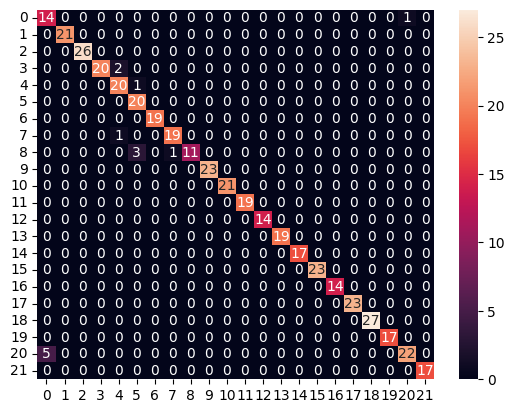

In [17]:
sns.heatmap(cm,annot=True)
plt.show()

In [18]:
pred = model.predict([x_test[0]])

In [19]:
for i,j in label_dict.items():
    if j == pred :
        print(i)
        break

muskmelon


In [20]:
import joblib

In [21]:
joblib.dump(model,"_model_.joblib")

['_model_.joblib']